In [150]:
import pandas as pd
import random
from copy import deepcopy
from scipy.linalg import svd, diagsvd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('data/ratings_small.csv')
df.drop(columns=["timestamp"], inplace=True)
dfp = df.pivot(index=["userId"], columns=["movieId"])
dfp.fillna(2.5, inplace=True)

In [152]:
def get(df, dfp):
    '''Retorna um index aleatório para (user X movie)'''
    ind = [i for i in dfp.index]
    col = [j for i,j in dfp.columns]
    i = df.iloc[random.randint(0,100003)]
    return (ind.index(int(i["userId"])), col.index(int(i["movieId"])))

In [153]:
def predict(df,dfp):
    A = dfp.to_numpy()
    B = deepcopy(A)

    ind = get(df,dfp)
    B[ind[0]][ind[1]] = random.randint(0,5)

    X, Y, Z = svd(B)
    Y[-669:] = 0
    sigma = diagsvd(Y, B.shape[0], B.shape[1])
    B = X @ sigma @ Z
    return ind, A[ind[0]][ind[1]], B[ind[0]][ind[1]]

In [154]:
def multPredictError(df,dfp,i):
    A = dfp.to_numpy()
    B = deepcopy(A)

    indices = []
    for _ in range(i):
        ind = get(df,dfp)
        B[ind[0]][ind[1]] = random.randint(0,5)
        indices.append(ind)

    X, Y, Z = svd(B)
    Y[-650:] = 0
    sigma = diagsvd(Y, B.shape[0], B.shape[1])
    B = X @ sigma @ Z

    error = np.array([abs(A[ind[0]][ind[1]] - B[ind[0]][ind[1]]) for ind in indices])
    return error.mean()

In [170]:
# runs = [1,100,200,300,400,500,600,700,800,900,1000]
# error = [multPredictError(df,dfp,1000) for i in range(1,101)]
error = []
for i in range(1,4):
    error.append(multPredictError(df,dfp,100))
    print(i)
d = {"iteração": list(range(1,101)), "Média do Erro Absoluto": error}
print(d)

1
2
3
{'iteração': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'Média do Erro Absoluto': [1.1938097539621018, 1.2403337968986334, 1.1480583455176931]}


In [ ]:
# d = {}
# for i in [1,100,200,300,400,500,600,700,800,900,1000]:
#     error = [multPredictError(df,dfp,1000) for _ in range(1,11)]
#     d[i] = error

In [157]:
dfa = pd.DataFrame.from_dict(d)
print(dfa)
dfa.to_csv('dadoooooos2222.csv', index=False)

    iteração  Média do Erro Absoluto
0          1                1.171035
1          2                1.115988
2          3                1.095184
3          4                1.107489
4          5                1.082509
..       ...                     ...
95        96                1.159458
96        97                1.124847
97        98                1.115977
98        99                1.124467
99       100                1.120233

[100 rows x 2 columns]


In [158]:
df_e = pd.read_csv('dadoooooos.csv')

media = np.mean(df_e['Média do Erro Absoluto'])
desvio_padrao = np.std(df_e['Média do Erro Absoluto'])
x = np.linspace(min(df_e['Média do Erro Absoluto']), max(df_e['Média do Erro Absoluto']), 100)
curva_normal = 1/(desvio_padrao * np.sqrt(2*np.pi)) * np.exp(-(x-media)**2 / (2*desvio_padrao**2))

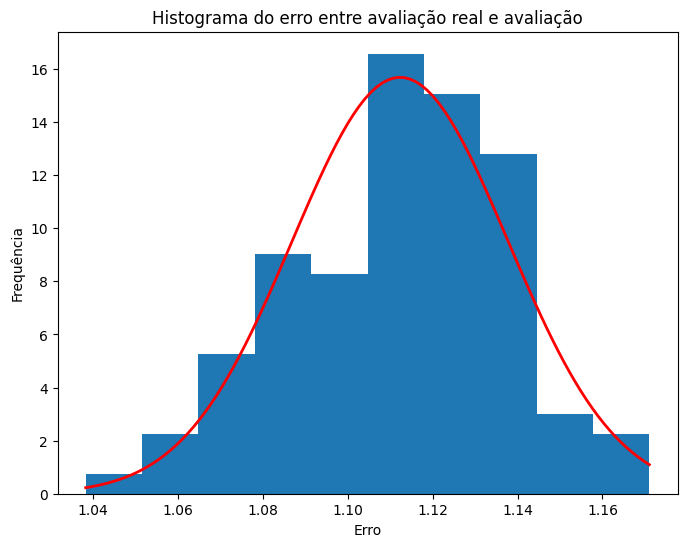

In [160]:
plt.figure(figsize=(8,6))
plt.hist(df_e['Média do Erro Absoluto'], bins=10, density=True)
plt.plot(x, curva_normal, 'r', linewidth=2)
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.title('Histograma do erro entre avaliação real e avaliação')
plt.show()